<a href="https://colab.research.google.com/github/abhranil-datascience/SOM_And_AutoEncodersPOC/blob/master/SOM_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

############# Approved Frauds ######################
Fraud1's Customer Number: 15583067.0
Fraud2's Customer Number: 15721507.0
Fraud3's Customer Number: 15622507.0
############# Rejected Frauds ######################
Fraud1's Customer Number: 15726466.0
Fraud2's Customer Number: 15605791.0
Fraud3's Customer Number: 15763108.0
Fraud4's Customer Number: 15723989.0
Fraud5's Customer Number: 15704509.0
Fraud6's Customer Number: 15706637.0
Fraud7's Customer Number: 15726167.0
Fraud8's Customer Number: 15586174.0
Fraud9's Customer Number: 15632275.0
Fraud10's Customer Number: 15727811.0


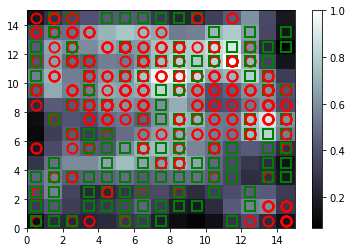

In [0]:
############################## Mount Drive ######################################## 
#from google.colab import drive
#drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/DL/SOM')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########## Import Dataset ###############
import pandas as pd
dataset=pd.read_csv('Credit_Card_Applications.csv')
X=dataset.iloc[:,0:15].values
Y=dataset.iloc[:,15].values
Customerdata=dataset.iloc[:,0:16].values
########## Feature Scaling ##############
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
XScaled=sc.fit_transform(X)
########## Implement SOM #################
from minisom import MiniSom
som=MiniSom(x=15,y=15,input_len=15,sigma=1.0,learning_rate=0.5,random_seed=2)
som.random_weights_init(XScaled)
som.train_random(data=XScaled,num_iteration=100)
########## Get Predictions ###############
## Step 1 :  First check the SOM map ##
from pylab import bone,colorbar,pcolor,plot,show
bone()
MeanInterNeuronDistances=som.distance_map()
MeanInterNeuronDistancesTransposed=MeanInterNeuronDistances.T
pcolor(MeanInterNeuronDistancesTransposed)
colorbar()
markers=['o','s']
colors=['r','g']
for row,col in enumerate(XScaled):
  winner=som.winner(col)
  plot(winner[0]+0.5,
       winner[1]+0.5,
       markers[Y[row]],
       markeredgecolor=colors[Y[row]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
### Only (8,10) and (11,11) have white background indicating chances of scam ###
### has green marker indicating the applications were accepted ###
mappings=som.win_map(XScaled)
frauds1=sc.inverse_transform(mappings[(8,10)])
frauds2=sc.inverse_transform(mappings[(11,11)])
import numpy as np
Frauds=np.concatenate((frauds1,frauds2),axis=0)
FraudsThatGotApproved=[]
FraudsThatWereNotApproved=[]
for customers in range(0,Customerdata.shape[0]):
  if Customerdata[customers][0] in Frauds[:,0]:
    #print("Match Found: "+str(Customerdata[customers][0]))
    if(Customerdata[customers][15]==1):
      #print("Match got approved")
      FraudsThatGotApproved.append(Customerdata[customers,:])
    else:
      FraudsThatWereNotApproved.append(Customerdata[customers,:])
FraudsThatGotApprovedArray=np.array(FraudsThatGotApproved)
FraudsThatWereNotApprovedArray=np.array(FraudsThatWereNotApproved)
print("############# Approved Frauds ######################")
for count in range(0,FraudsThatGotApprovedArray.shape[0]):
  print("Fraud"+str(count+1)+"'s Customer Number: "+str(FraudsThatGotApprovedArray[count][0]))
print("############# Rejected Frauds ######################")
for count in range(0,FraudsThatWereNotApprovedArray.shape[0]):
  print("Fraud"+str(count+1)+"'s Customer Number: "+str(FraudsThatWereNotApprovedArray[count][0]))